In [1]:
from matplotlib import pyplot as plt
import cv2


In [22]:
image = cv2.imread("C:\\Users\\shail\\Documents\\Projects\\Dominant color extraction\\scenary.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_shape = image.shape
print(image.shape)


(1200, 1920, 3)


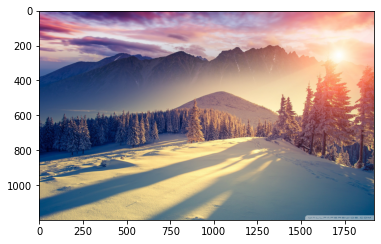

In [3]:
plt.imshow(image)
plt.show()


In [4]:
# Flatten Each channel of the Image
all_pixels = image.reshape((-1,3))
print(all_pixels.shape)

(2304000, 3)


In [6]:
from sklearn.cluster import KMeans

In [8]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [10]:
import numpy as np

In [13]:
centers = np.asarray(km.cluster_centers_, dtype='uint8')
print(centers)

[[114 105 120]
 [238 207 172]
 [ 40  59  99]
 [185 148 140]]


Plot what all colours are these?

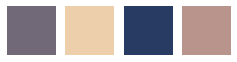

In [16]:
i = 1

plt.figure(0,figsize=(4,2))

colours = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1

    colours.append(each_col)

    #Colour Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)

plt.show()


Segmenting Our Original Image

In [18]:
new_image = np.zeros((1200*1920,3),dtype='uint8')

print(new_image.shape)

(2304000, 3)


In [19]:
colours

[array([114, 105, 120], dtype=uint8),
 array([238, 207, 172], dtype=uint8),
 array([40, 59, 99], dtype=uint8),
 array([185, 148, 140], dtype=uint8)]

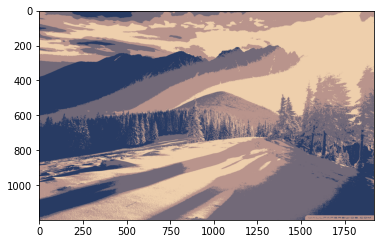

In [23]:
for x in range(new_image.shape[0]):
    new_image[x] = colours[km.labels_[x]]

new_image = new_image.reshape((original_shape))
plt.imshow(new_image)
plt.show()